In [1]:
import scanpy as sc
import omicverse as ov
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


In [2]:
adata = sc.read_h5ad("./pydata/adata_total_without_Others.h5ad")
adata

AnnData object with n_obs × n_vars = 223764 × 5000
    obs: 'sample', 'Processing', 'genotype', 'scrublet_score', 'Group', 'Binary Stage', 'Stage', 'dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_outlier', 'outlier', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'minor_celltype', 'anno_celltype'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Binary Stage_colors', 'Stage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'anno_celltype_colors', 'dataset_colors', 'dendr

In [ ]:
sc.pl.dotplot(
    adata,
    groupby="Stage",
    var_names=["AXL","ITGAX","ITG","CXCL10","CXCR3","CD40","TNF"],
    dendrogram=False,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
    # save="immune_markers.pdf",
)

In [ ]:
# adata_count = adata.raw.to_adata().copy()
# adata_count.write_h5ad("./pydata/adata_total_without_Others_to_r.h5ad")
# adata_count

AnnData object with n_obs × n_vars = 227744 × 17491
    obs: 'sample', 'Processing', 'genotype', 'scrublet_score', 'Group', 'Binary Stage', 'Stage', 'dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'mt_outlier', 'outlier', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'minor_celltype', 'anno_celltype'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Binary Stage_colors', 'Stage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'anno_celltype_colors', 'dataset_colors', 'dend

<AxesSubplot: title={'center': 'Clusters'}, xlabel='X_umap1', ylabel='X_umap2'>

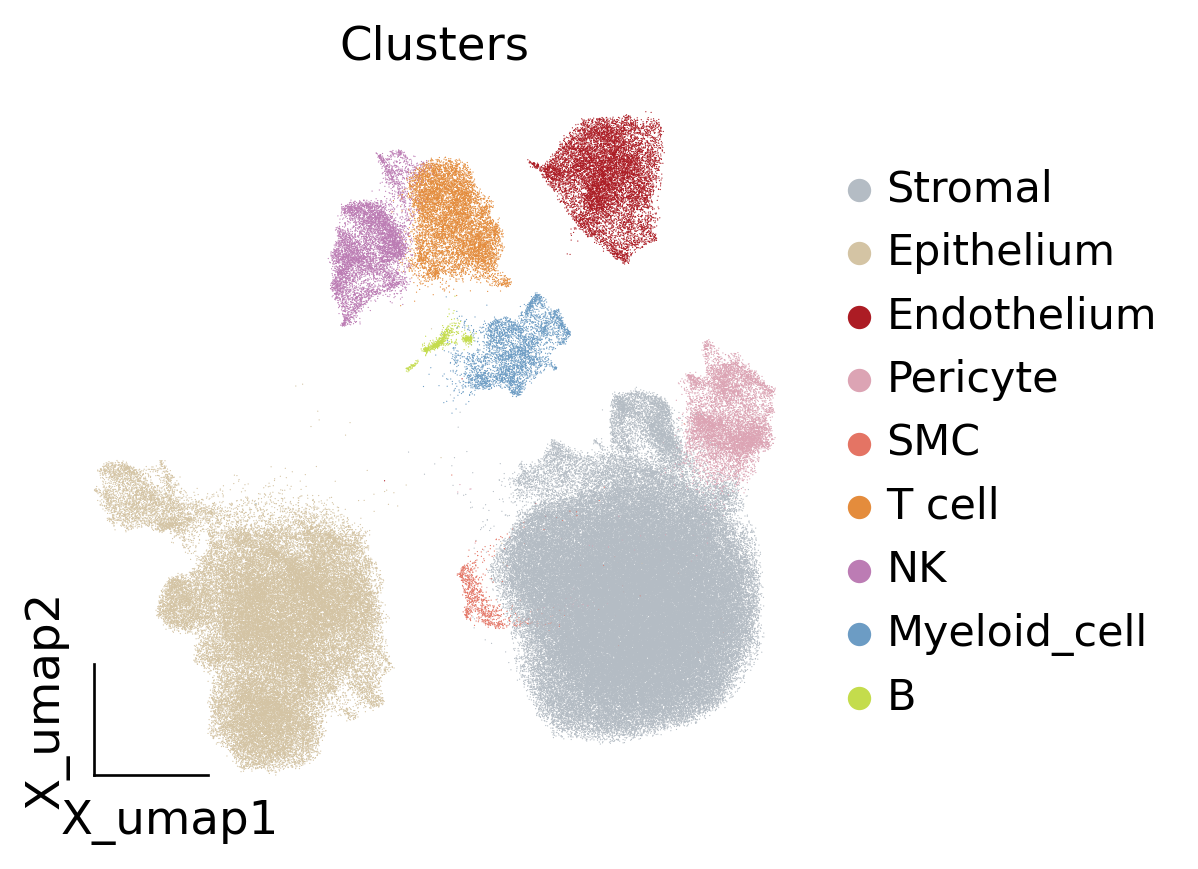

In [5]:
ov.utils.embedding(adata,
                basis='X_umap',
                color=[ "anno_celltype"],
                title=['Clusters'],
                # palette=ov.palette()[:],
                show=False,frameon='small',)

In [ ]:
adata

In [29]:
import utools
adata_compare = adata[adata.obs.Stage.isin(["Secretory Mid","Secretory Mid(APS)","Secretory Mid(RIF)"])]

In [30]:
adata_compare.obs[["anno_celltype","Stage"]].value_counts()

anno_celltype  Stage             
Stromal        Secretory Mid         32241
               Secretory Mid(RIF)    24394
               Secretory Mid(APS)    24219
Epithelium     Secretory Mid          8299
               Secretory Mid(APS)     3235
NK             Secretory Mid          2518
T cell         Secretory Mid          1918
               Secretory Mid(APS)     1202
Endothelium    Secretory Mid          1167
T cell         Secretory Mid(RIF)     1040
Pericyte       Secretory Mid           972
Endothelium    Secretory Mid(APS)      863
NK             Secretory Mid(APS)      815
Myeloid_cell   Secretory Mid           745
Pericyte       Secretory Mid(APS)      605
               Secretory Mid(RIF)      595
NK             Secretory Mid(RIF)      516
Endothelium    Secretory Mid(RIF)      498
Epithelium     Secretory Mid(RIF)      478
Myeloid_cell   Secretory Mid(APS)      472
               Secretory Mid(RIF)      400
B              Secretory Mid           121
               Secre

In [35]:
adata_compare = adata_compare[~adata_compare.obs.anno_celltype.isin(["SMC"])]
roe=utools.roe(adata_compare,sample_key='Stage',cell_type_key='anno_celltype')

chi2: 5600.652235350672, dof: 14, pvalue: 0.0


Original cmap N: 256
Custom palette length: 205
New cmap length: 205


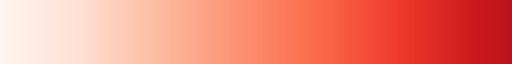

In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

# 获取原始cmap
cmap = cm.get_cmap('Reds')

# 检查原始cmap中的颜色数量
print("Original cmap N:", cmap.N)

# 创建自定义调色板
palette_custom = [mcolors.rgb2hex(cmap(i)) for i in range(1,cmap.N - 50)]
print("Custom palette length:", len(palette_custom))

# 使用自定义调色板创建新的colormap
new_cmap = mcolors.ListedColormap(palette_custom)

# 检查新的colormap的长度
print("New cmap length:", len(new_cmap.colors))

new_cmap

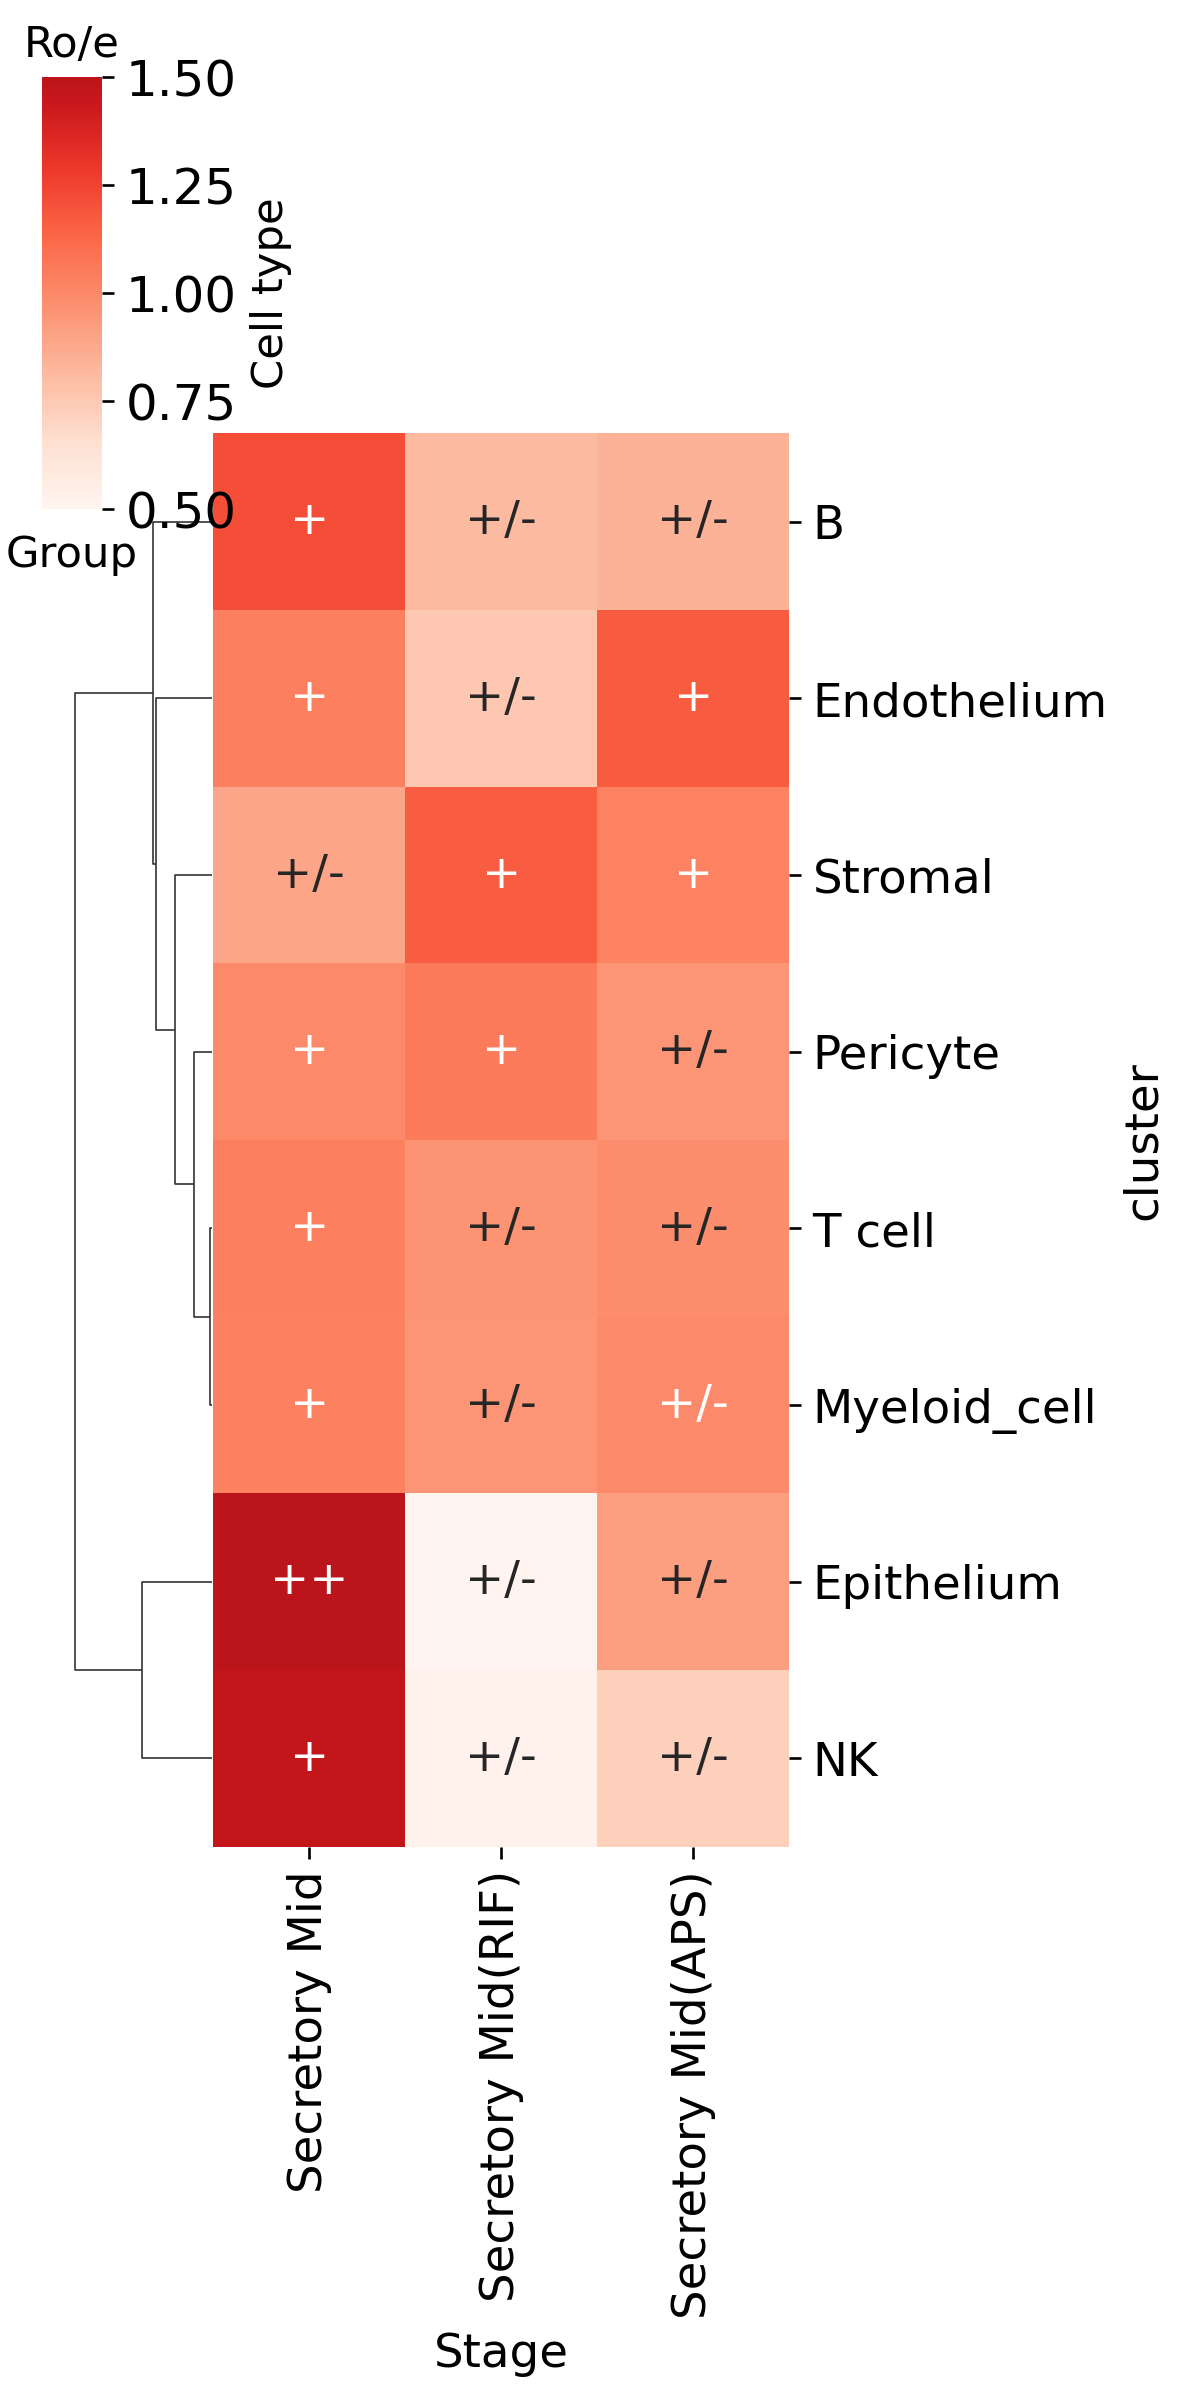

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(6,12))

transformed_roe = roe.copy()
transformed_roe = transformed_roe.applymap(
    lambda x: '+++' if x >= 2 else ('++' if x >= 1.5 else ('+' if x >= 1 else '+/-')))

sns.clustermap(roe, annot=transformed_roe, cmap=new_cmap, fmt='',
                cbar=True, figsize=(5, 10), vmin=0.5, vmax=1.5, 
                cbar_kws={'shrink': 0.5}, col_cluster=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Group',fontsize=13)
plt.ylabel('Cell type',fontsize=13)
plt.title('Ro/e',fontsize=13)
# 保存图形为PDF文件
plt.savefig('figures/roe_total_anno.pdf', format='pdf', bbox_inches='tight')
# plt.close(fig)  # 关闭图形，释放内存

In [9]:
# 第二种方法：每个样本某一细胞类型占这个样本这一细胞类型的比例
cell_sample_counts = adata_compare.obs.groupby(['anno_celltype', 'genotype', 'Stage']).size().reset_index(name='N')
# 删除 NTotal 等于 0 的行
cell_sample_counts = cell_sample_counts[cell_sample_counts['N'] != 0]
cell_sample_counts.sample(5)


,anno_celltype,genotype,Stage,N
135,Endothelium,Ctrl-2,Secretory Mid,17
153,Endothelium,E1,Secretory Mid,118
371,NK,APS-4,Secretory Mid(APS),93
21,Stromal,Ctrl-4,Secretory Mid,434
220,Pericyte,RIF-1,Secretory Mid(RIF),146


In [10]:
cell_total_counts = cell_sample_counts.groupby(['genotype', 'Stage'])['N'].sum().reset_index(name='NTotal')
# 删除 NTotal 等于 0 的行
cell_total_counts = cell_total_counts[cell_total_counts['NTotal'] != 0]

cell_total_counts

,genotype,Stage,NTotal
2,APS-1,Secretory Mid(APS),9530
5,APS-2,Secretory Mid(APS),6789
8,APS-3,Secretory Mid(APS),10031
11,APS-4,Secretory Mid(APS),5132
12,Ctrl-1,Secretory Mid,4648
15,Ctrl-2,Secretory Mid,4380
18,Ctrl-3,Secretory Mid,4396
21,Ctrl-4,Secretory Mid,1441
24,Ctrl-5,Secretory Mid,1198
27,Ctrl-6,Secretory Mid,2366


In [11]:
filtered_cell_sample_counts = cell_sample_counts[cell_sample_counts['Stage'].isin(['Secretory Mid', 'Secretory Mid(APS)'])]
filtered_cell_sample_counts

,anno_celltype,genotype,Stage,N
2,Stromal,APS-1,Secretory Mid(APS),6798
5,Stromal,APS-2,Secretory Mid(APS),4597
8,Stromal,APS-3,Secretory Mid(APS),8803
11,Stromal,APS-4,Secretory Mid(APS),4021
12,Stromal,Ctrl-1,Secretory Mid,4351
...,...,...,...,...
507,B,Ctrl-6,Secretory Mid,24
510,B,Ctrl-7,Secretory Mid,10
513,B,E1,Secretory Mid,30
516,B,GSM6605437,Secretory Mid,9


In [12]:
# 过滤 cell_total_counts，只保留 Stage 为 "abc" 或 "bcd" 的行
filtered_cell_total_counts = cell_total_counts[cell_total_counts['Stage'].isin(['Secretory Mid', 'Secretory Mid(APS)'])]
filtered_cell_total_counts

,genotype,Stage,NTotal
2,APS-1,Secretory Mid(APS),9530
5,APS-2,Secretory Mid(APS),6789
8,APS-3,Secretory Mid(APS),10031
11,APS-4,Secretory Mid(APS),5132
12,Ctrl-1,Secretory Mid,4648
15,Ctrl-2,Secretory Mid,4380
18,Ctrl-3,Secretory Mid,4396
21,Ctrl-4,Secretory Mid,1441
24,Ctrl-5,Secretory Mid,1198
27,Ctrl-6,Secretory Mid,2366


In [13]:

# 合并

cell_data = filtered_cell_sample_counts.merge(filtered_cell_total_counts, on=['genotype', 'Stage'])
cell_data['Percentage'] = (cell_data['N'] / cell_data['NTotal'] * 100).round(2)

# 合并 "Young" 和 "Adult"
# cell_data['Group'] = np.where(cell_data['Stage'].isin(['Secretory Mid', 'Secretory Mid(APS)']), 'Young_Adult', cell_data['Stage'])
cell_data['Group'] = cell_data['Stage']
cell_data['Group'] = pd.Categorical(cell_data['Group'], categories=['Secretory Mid', 'Secretory Mid(APS)'], ordered=True)
# 将 Percentage 列中的 NaN 值替换为 0
cell_data['Percentage'] = cell_data['Percentage'].fillna(0)

cell_data.sample(10)

,anno_celltype,genotype,Stage,N,NTotal,Percentage,Group
6,NK,APS-1,Secretory Mid(APS),384,9530,4.03,Secretory Mid(APS)
86,Pericyte,Ctrl-7,Secretory Mid,16,6597,0.24,Secretory Mid
68,Epithelium,Ctrl-5,Secretory Mid,157,1198,13.11,Secretory Mid
95,T cell,E1,Secretory Mid,164,7005,2.34,Secretory Mid
52,Epithelium,Ctrl-3,Secretory Mid,29,4396,0.66,Secretory Mid
19,Endothelium,APS-3,Secretory Mid(APS),304,10031,3.03,Secretory Mid(APS)
25,B,APS-3,Secretory Mid(APS),16,10031,0.16,Secretory Mid(APS)
58,B,Ctrl-3,Secretory Mid,17,4396,0.39,Secretory Mid
47,T cell,Ctrl-2,Secretory Mid,303,4380,6.92,Secretory Mid
77,Endothelium,Ctrl-6,Secretory Mid,14,2366,0.59,Secretory Mid


In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
# 进行 t 检验
results = cell_data.groupby('anno_celltype').apply(lambda x: pd.Series({
    'pval': stats.ttest_ind(
        x[x['Group'] == 'Secretory Mid']['Percentage'],
        x[x['Group'] == 'Secretory Mid(APS)']['Percentage']
    ).pvalue,
    'Difference': x[x['Group'] == 'Secretory Mid(APS)']['Percentage'].mean() - x[x['Group'] == 'Secretory Mid']['Percentage'].mean()
})).reset_index()
results
# 添加阈值列
results['threshold'] = np.where(results['Difference'] > 0, 'UP', 'DOWN')
results_aps = results

results

,anno_celltype,pval,Difference,threshold
0,Stromal,0.388920,13.1895,UP
1,Epithelium,0.596540,-5.2995,DOWN
2,Endothelium,0.622730,0.7695,UP
3,Pericyte,0.571103,0.4370,UP
4,SMC,0.481679,0.0600,UP
5,T cell,0.502570,-2.8715,DOWN
6,NK,0.409820,-4.6060,DOWN
7,Myeloid_cell,0.464737,-1.4225,DOWN
8,B,0.344783,-0.2325,DOWN


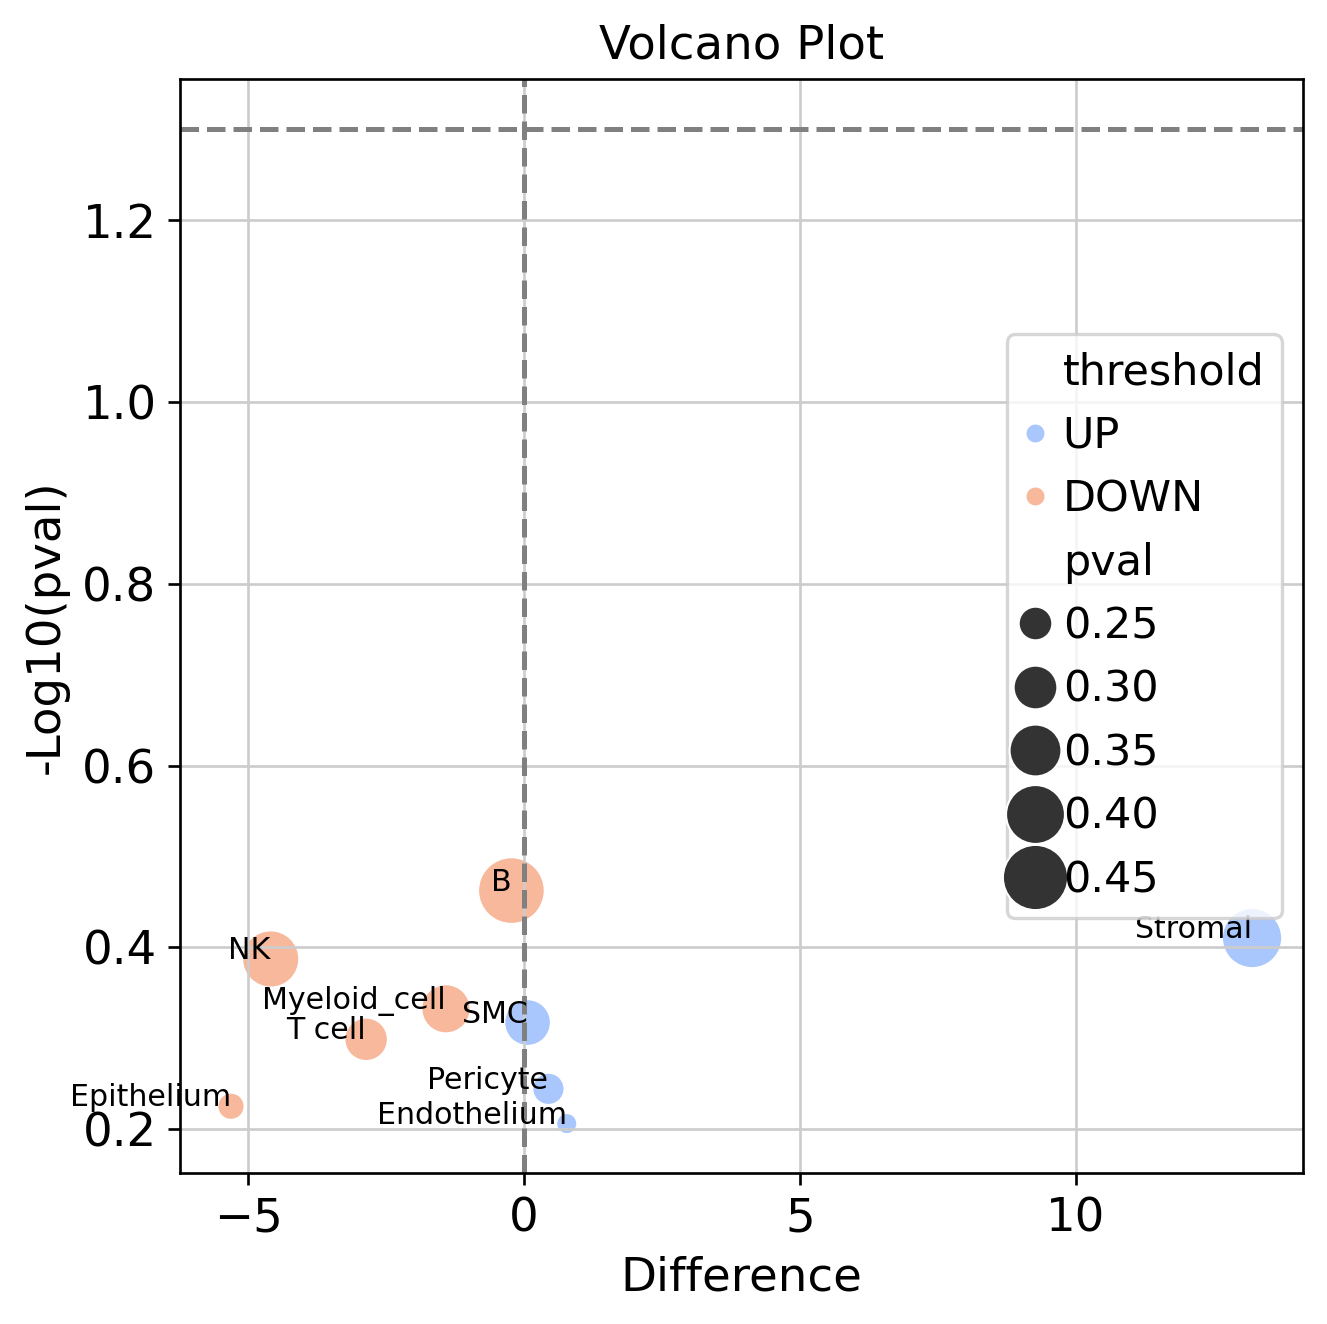

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(6, 6))
sns.scatterplot(data=results, x='Difference', y=-np.log10(results['pval']),
                hue='threshold', palette='coolwarm', 
                size=-np.log10(results['pval']), sizes=(40, 400))

# 添加参考线
plt.axhline(y=-np.log10(0.05), linestyle='--', color='gray')
plt.axvline(x=0, linestyle='--', color='gray')

# 设置轴标签和标题
plt.xlabel('Difference')
plt.ylabel('-Log10(pval)')
plt.title('Volcano Plot')

# 标记 minor_celltype
for i in range(len(results)):
    if results['anno_celltype'].iloc[i]:  # 假设minor_celltype是布尔值
        plt.text(results['Difference'].iloc[i], -np.log10(results['pval'].iloc[i]),
                 results['anno_celltype'].iloc[i], fontsize=9, ha='right')


# plt.savefig("./figures/volcano_aps.pdf")
plt.show()

In [16]:
filtered_cell_sample_counts = cell_sample_counts[cell_sample_counts['Stage'].isin(['Secretory Mid', 'Secretory Mid(RIF)'])]

filtered_cell_sample_counts

,anno_celltype,genotype,Stage,N
12,Stromal,Ctrl-1,Secretory Mid,4351
15,Stromal,Ctrl-2,Secretory Mid,3787
18,Stromal,Ctrl-3,Secretory Mid,3787
21,Stromal,Ctrl-4,Secretory Mid,434
24,Stromal,Ctrl-5,Secretory Mid,670
...,...,...,...,...
526,B,RIF-3,Secretory Mid(RIF),5
529,B,RIF-4,Secretory Mid(RIF),22
532,B,RIF-5,Secretory Mid(RIF),6
535,B,RIF-6,Secretory Mid(RIF),8


In [17]:
# 过滤 cell_total_counts，只保留 Stage 为 "abc" 或 "bcd" 的行
filtered_cell_total_counts = cell_total_counts[cell_total_counts['Stage'].isin(['Secretory Mid', 'Secretory Mid(RIF)'])]
filtered_cell_total_counts

,genotype,Stage,NTotal
12,Ctrl-1,Secretory Mid,4648
15,Ctrl-2,Secretory Mid,4380
18,Ctrl-3,Secretory Mid,4396
21,Ctrl-4,Secretory Mid,1441
24,Ctrl-5,Secretory Mid,1198
27,Ctrl-6,Secretory Mid,2366
30,Ctrl-7,Secretory Mid,6597
33,E1,Secretory Mid,7005
36,GSM6605437,Secretory Mid,7357
40,RIF-1,Secretory Mid(RIF),4682


In [19]:

# 合并

cell_data = filtered_cell_sample_counts.merge(filtered_cell_total_counts, on=['genotype', 'Stage'])
cell_data['Percentage'] = (cell_data['N'] / cell_data['NTotal'] * 100).round(2)

# 合并 "Young" 和 "Adult"
# cell_data['Group'] = np.where(cell_data['Stage'].isin(['Secretory Mid', 'Secretory Mid(APS)']), 'Young_Adult', cell_data['Stage'])
cell_data['Group'] = cell_data['Stage']
cell_data['Group'] = pd.Categorical(cell_data['Group'], categories=['Secretory Mid', 'Secretory Mid(RIF)'], ordered=True)
# 将 Percentage 列中的 NaN 值替换为 0
cell_data['Percentage'] = cell_data['Percentage'].fillna(0)

cell_data.sample(10)

,anno_celltype,genotype,Stage,N,NTotal,Percentage,Group
93,Pericyte,RIF-3,Secretory Mid(RIF),141,5917,2.38,Secretory Mid(RIF)
113,B,RIF-5,Secretory Mid(RIF),6,3077,0.19,Secretory Mid(RIF)
55,Myeloid_cell,Ctrl-7,Secretory Mid,12,6597,0.18,Secretory Mid
66,Epithelium,GSM6605437,Secretory Mid,2632,7357,35.78,Secretory Mid
120,Myeloid_cell,RIF-6,Secretory Mid(RIF),107,5076,2.11,Secretory Mid(RIF)
103,NK,RIF-4,Secretory Mid(RIF),194,4263,4.55,Secretory Mid(RIF)
95,NK,RIF-3,Secretory Mid(RIF),67,5917,1.13,Secretory Mid(RIF)
127,T cell,SAMN15049049,Secretory Mid,8,8596,0.09,Secretory Mid
77,T cell,RIF-1,Secretory Mid(RIF),79,4682,1.69,Secretory Mid(RIF)
37,T cell,Ctrl-5,Secretory Mid,128,1198,10.68,Secretory Mid


In [20]:

# 进行 t 检验
results = cell_data.groupby('anno_celltype').apply(lambda x: pd.Series({
    'pval': stats.ttest_ind(
        x[x['Group'] == 'Secretory Mid']['Percentage'],
        x[x['Group'] == 'Secretory Mid(RIF)']['Percentage']
    ).pvalue,
    'Difference': (x[x['Group'] == 'Secretory Mid(RIF)']['Percentage'].mean() - x[x['Group'] == 'Secretory Mid']['Percentage'].mean())
})).reset_index()
results
# 添加阈值列
results['threshold'] = np.where(results['Difference'] > 0, 'UP', 'DOWN')
results_rif = results

results

,anno_celltype,pval,Difference,threshold
0,Stromal,0.063411,23.737000,UP
1,Epithelium,0.086852,-14.208667,DOWN
2,Endothelium,0.805809,-0.313000,DOWN
3,Pericyte,0.505749,0.415333,UP
4,SMC,0.000000,0.020000,UP
5,T cell,0.434416,-2.760667,DOWN
6,NK,0.260489,-5.132667,DOWN
7,Myeloid_cell,0.340625,-1.513333,DOWN
8,B,0.272664,-0.226667,DOWN


posx and posy should be finite values
posx and posy should be finite values


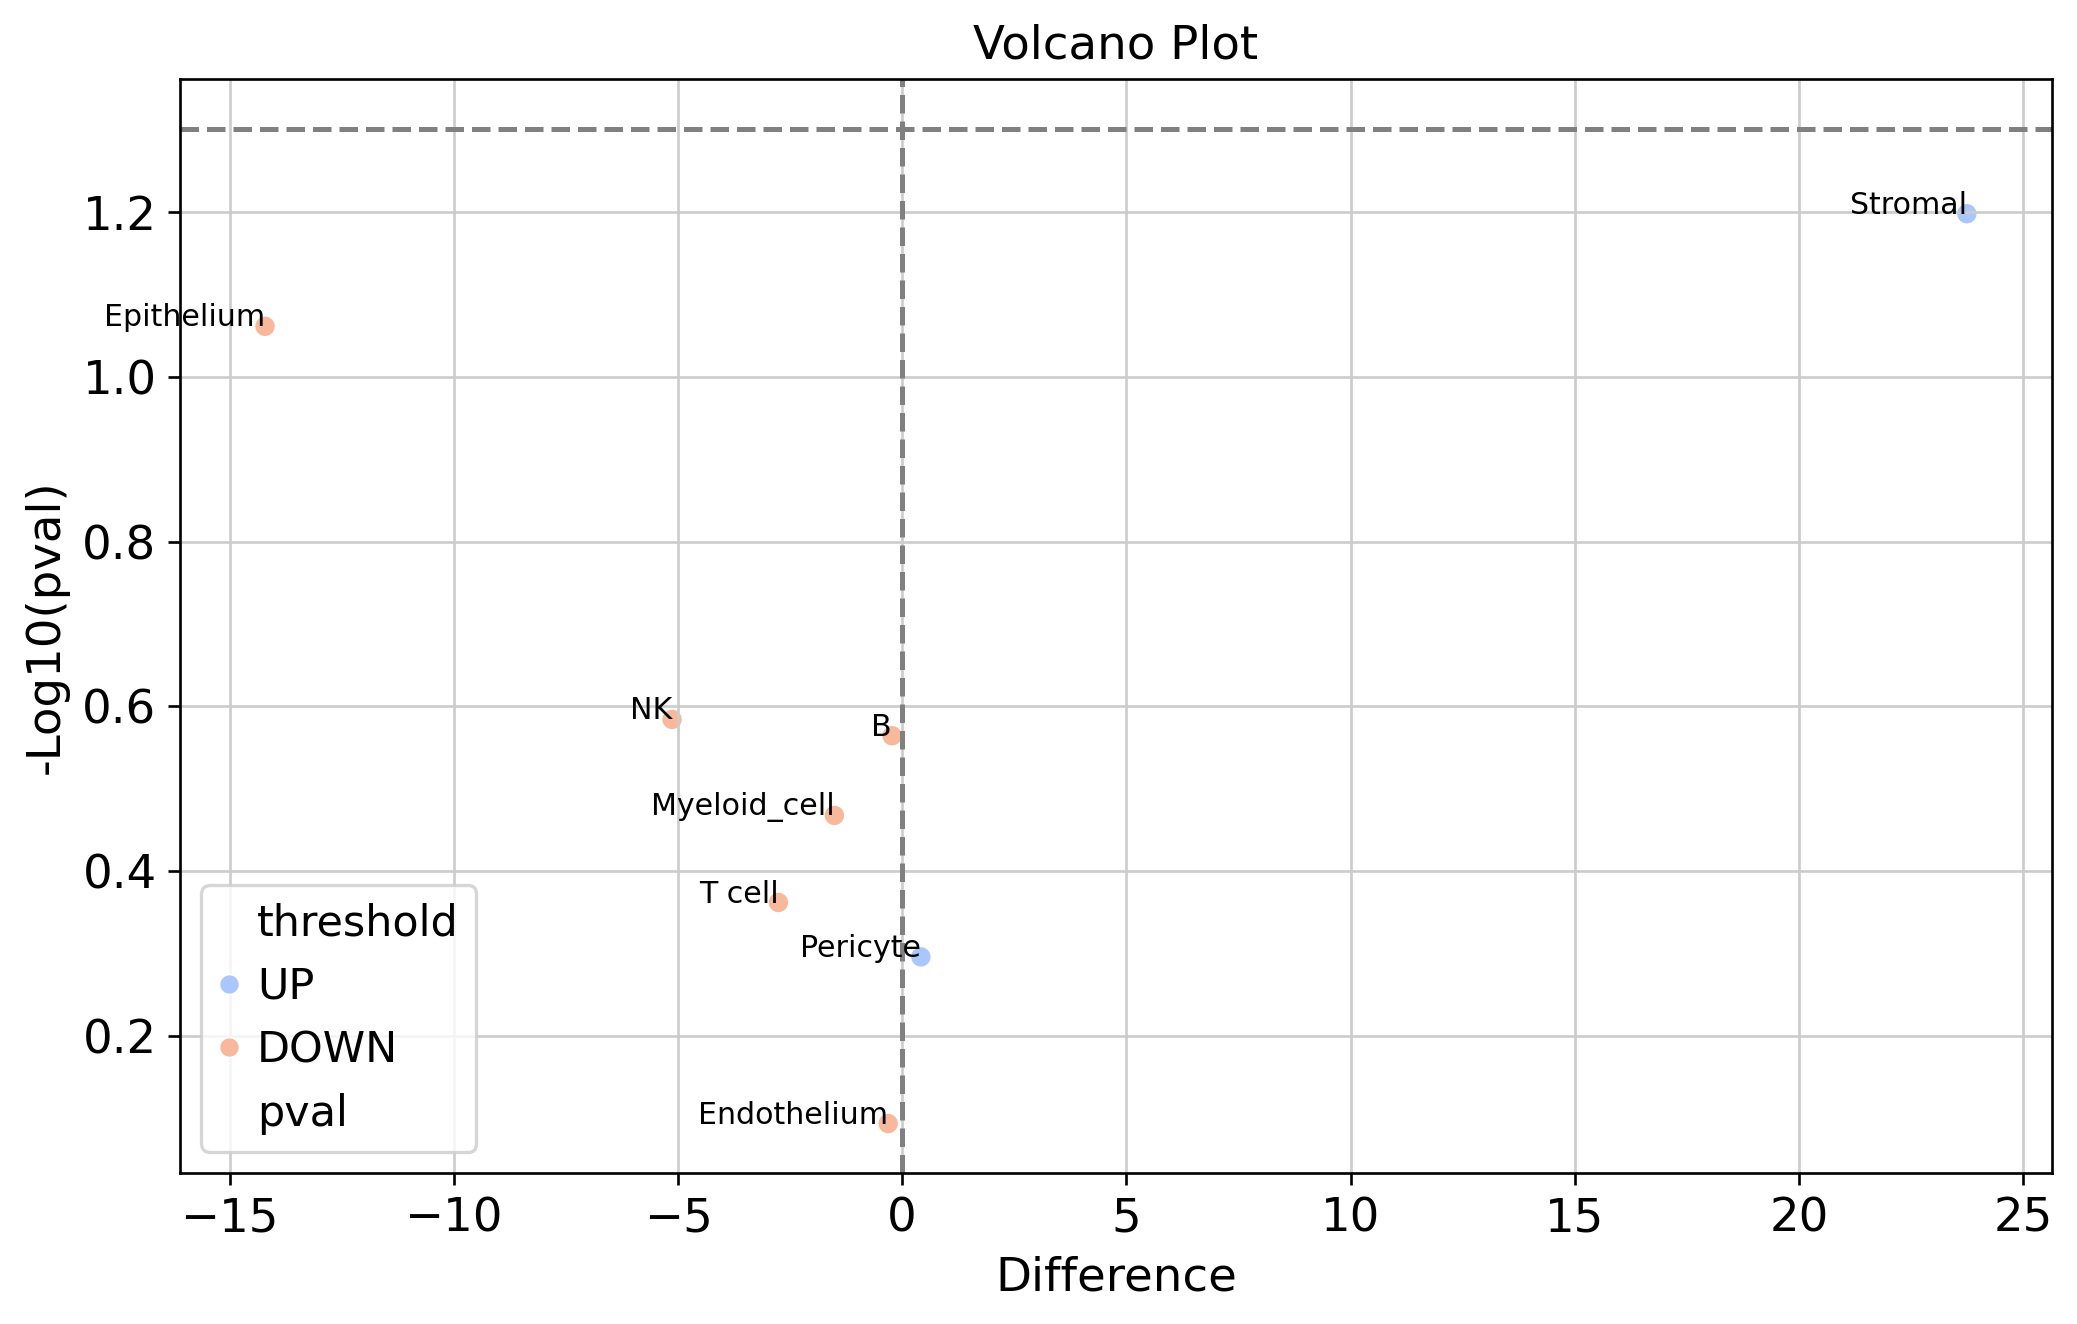

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='Difference', y=-np.log10(results['pval']),
                hue='threshold', palette='coolwarm', 
                size=-np.log10(results['pval']), sizes=(40, 400))

# 添加参考线
plt.axhline(y=-np.log10(0.05), linestyle='--', color='gray')
plt.axvline(x=0, linestyle='--', color='gray')

# 设置轴标签和标题
plt.xlabel('Difference')
plt.ylabel('-Log10(pval)')
plt.title('Volcano Plot')

# 标记 minor_celltype
for i in range(len(results)):
    if results['anno_celltype'].iloc[i]:  # 假设minor_celltype是布尔值
        plt.text(results['Difference'].iloc[i], -np.log10(results['pval'].iloc[i]),
                 results['anno_celltype'].iloc[i], fontsize=9, ha='right')

plt.show()


In [145]:
# # 删除 Difference 小于 0.1 的行
# # 删除绝对值小于 1 的行
# results_aps = results_aps[results_aps['Difference'].abs() >= 1]

# # 删除绝对值小于 1 的行
# results_rif = results_rif[results_rif['Difference'].abs() >= 1]


交集 (Intersection): {'Epithelium', 'Myeloid_cell', 'B', 'T cell', 'NK'}
APS 的差集 (Difference with RIF): set()
RIF 的差集 (Difference with APS): {'Endothelium'}


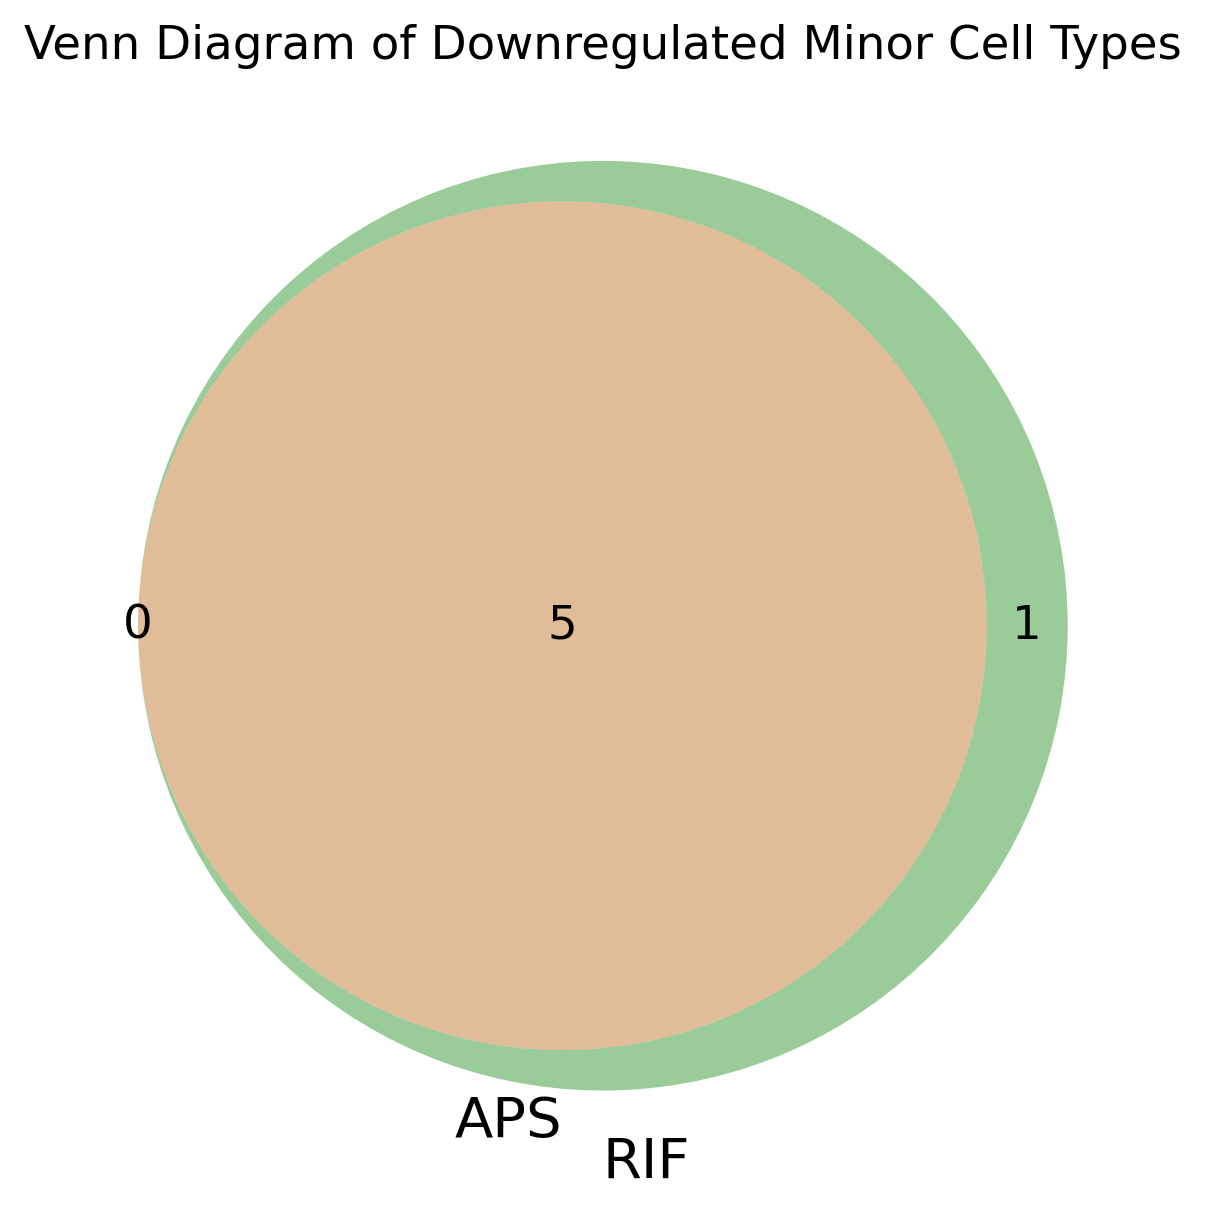

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 假设 result1 和 result2 都是 DataFrame
downregulated1 = set(results_aps[results_aps['threshold'] == 'DOWN']['anno_celltype'])
downregulated2 = set(results_rif[results_rif['threshold'] == 'DOWN']['anno_celltype'])

# 计算交集和差集
intersection = downregulated1.intersection(downregulated2)
difference1 = downregulated1.difference(downregulated2)
difference2 = downregulated2.difference(downregulated1)

# 打印结果
print("交集 (Intersection):", intersection)
print("APS 的差集 (Difference with RIF):", difference1)
print("RIF 的差集 (Difference with APS):", difference2)

# 绘制 Venn 图
plt.figure(figsize=(8, 6))
venn2([downregulated1, downregulated2], ('APS', 'RIF'))

plt.title('Venn Diagram of Downregulated Minor Cell Types')
# plt.show()
# plt.show()
plt.savefig("figures/venn_downregulated.pdf")

交集 (Intersection): {'SMC', 'Stromal', 'Pericyte'}
APS 的差集 (Difference with RIF): {'Endothelium'}
RIF 的差集 (Difference with APS): set()


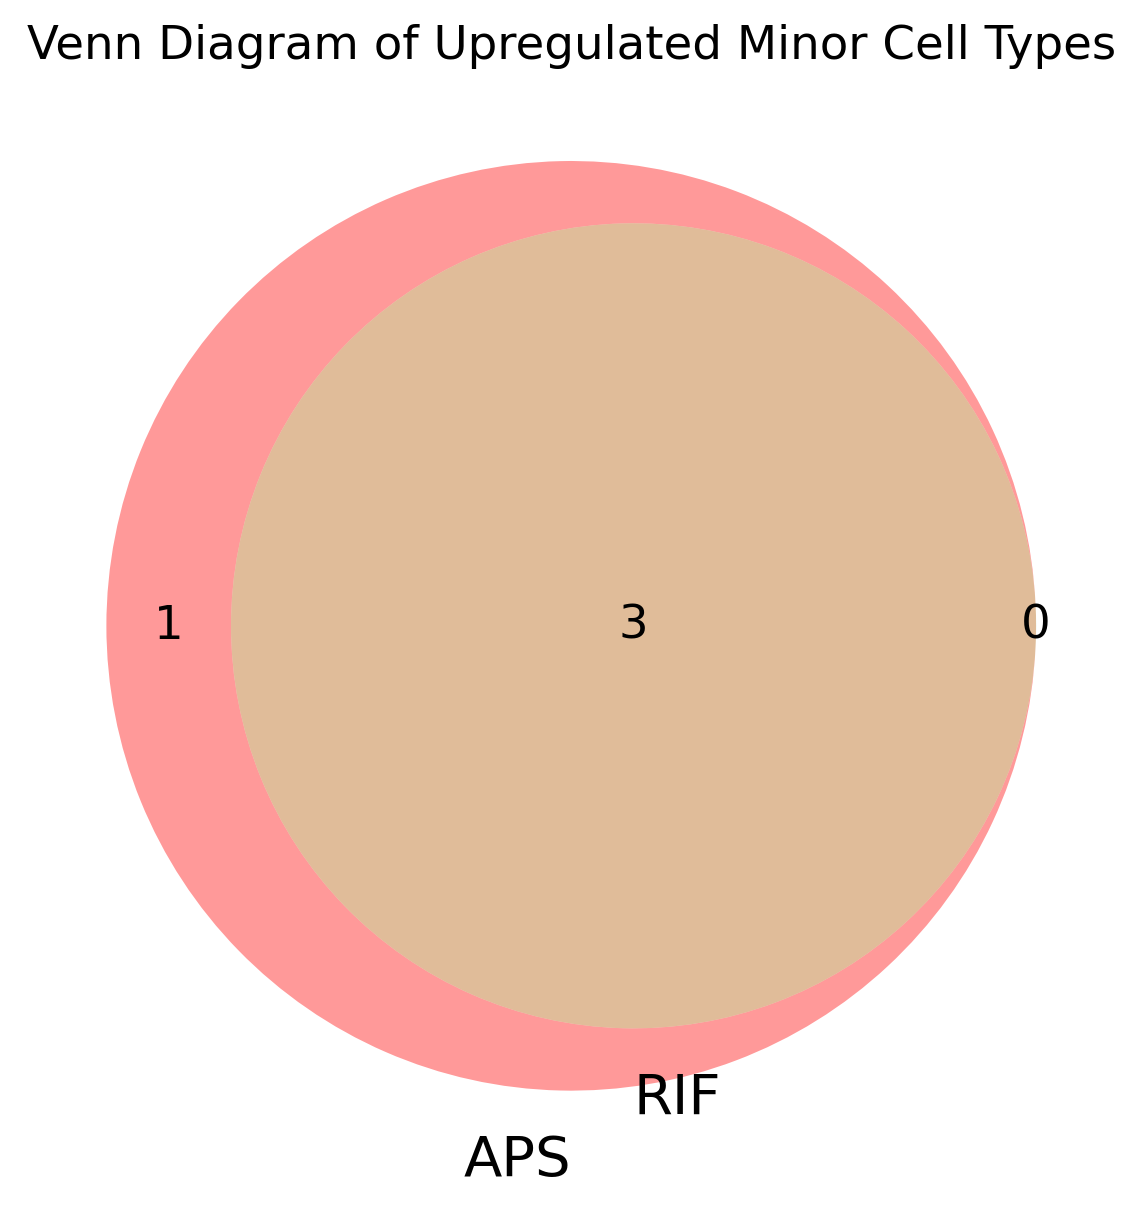

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 假设 result1 和 result2 都是 DataFrame
downregulated1 = set(results_aps[results_aps['threshold'] == 'UP']['anno_celltype'])
downregulated2 = set(results_rif[results_rif['threshold'] == 'UP']['anno_celltype'])

# 计算交集和差集
intersection = downregulated1.intersection(downregulated2)
difference1 = downregulated1.difference(downregulated2)
difference2 = downregulated2.difference(downregulated1)

# 打印结果
print("交集 (Intersection):", intersection)
print("APS 的差集 (Difference with RIF):", difference1)
print("RIF 的差集 (Difference with APS):", difference2)

# 绘制 Venn 图
plt.figure(figsize=(8, 6))
venn2([downregulated1, downregulated2], ('APS', 'RIF'))

plt.title('Venn Diagram of Upregulated Minor Cell Types')
# plt.show()
plt.savefig("figures/venn_upregulated.pdf")

In [25]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata1=sc.AnnData(adata.X,obs=pd.DataFrame(index=adata.obs.index),
                          var=pd.DataFrame(index=adata.var.index))
adata1.write_h5ad('pydata/cpdb_total/norm_log.h5ad',compression='gzip')
adata1

AnnData object with n_obs × n_vars = 223735 × 5000

In [26]:
#meta导出
df_meta = pd.DataFrame(data={'Cell':list(adata[adata1.obs.index].obs.index),
                             'cell_type':[ i for i in adata[adata1.obs.index].obs['anno_celltype']]
                            })
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('pydata/cpdb_total/meta.tsv', sep = '\t')

In [27]:
cpdb_file_path = os.getcwd()+'/pydata/cpdb_total/cellphonedb.zip'
meta_file_path = os.getcwd()+'/pydata/cpdb_total/meta.tsv'
counts_file_path = os.getcwd()+'/pydata/cpdb_total/norm_log.h5ad'
microenvs_file_path = None
active_tf_path = None
out_path =os.getcwd()+'/pydata/cpdb_total/test_cellphone'

In [29]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    active_tfs_file_path = active_tf_path,           # optional: defines cell types and their active TFs.
    microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    score_interactions = True,                       # optional: whether to score interactions or not. 
    iterations = 100,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 10,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/norm_log.h5ad
/home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/meta.tsv
[ ][CORE][15/02/25-10:50:10][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:100 Debug-seed:42 Threads:10 Precision:3
[ ][CORE][15/02/25-10:50:10][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][15/02/25-10:50:16][INFO] Running Real Analysis
[ ][CORE][15/02/25-10:50:16][INFO] Running Statistical Analysis


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:07<00:00,  1.27s/it]

[ ][CORE][15/02/25-10:52:24][INFO] Building Pvalues result
[ ][CORE][15/02/25-10:52:24][INFO] Building results


[ ][CORE][15/02/25-10:52:24][INFO] Scoring interactions: Filtering genes per cell type..


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.55it/s]

[ ][CORE][15/02/25-10:52:27][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 11.53it/s]


[ ][CORE][15/02/25-10:52:28][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:04<00:00, 19.26it/s]


Saved deconvoluted to /home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/test_cellphone/statistical_analysis_deconvoluted_02_15_2025_105233.txt
Saved deconvoluted_percents to /home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/test_cellphone/statistical_analysis_deconvoluted_percents_02_15_2025_105233.txt
Saved means to /home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/test_cellphone/statistical_analysis_means_02_15_2025_105233.txt
Saved pvalues to /home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/test_cellphone/statistical_analysis_pvalues_02_15_2025_105233.txt
Saved significant_means to /home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/test_cellphone/statistical_analysis_significant_means_02_15_2025_105233.txt
Saved interaction_scores to /home/zyy/2025_yang_APS_lanscape/APS_lanscape/pydata/cpdb_total/test_cellphone/statistical_analysis_interaction_scores_02_15_2025_105233.txt


In [30]:
ov.utils.save(cpdb_results,'pydata/cpdb_total/gex_cpdb_test.pkl')

In [31]:
cpdb_results=ov.utils.load('pydata/cpdb_total/gex_cpdb_test.pkl')

In [32]:
interaction=ov.single.cpdb_network_cal(adata = adata,
        pvals = cpdb_results['pvalues'],
        celltype_key = "anno_celltype",)   

ktplotspy have been install version: 0.2.6


In [33]:
interaction['interaction_edges'].head()

,SOURCE,TARGET,COUNT
0,B,B,22
1,B,Endothelium,11
2,B,Epithelium,1
3,B,Myeloid_cell,31
4,B,NK,29


In [29]:
ov.plot_set()

All dependencies are satisfied.


ModuleNotFoundError: No module named 'PyComplexHeatmap'

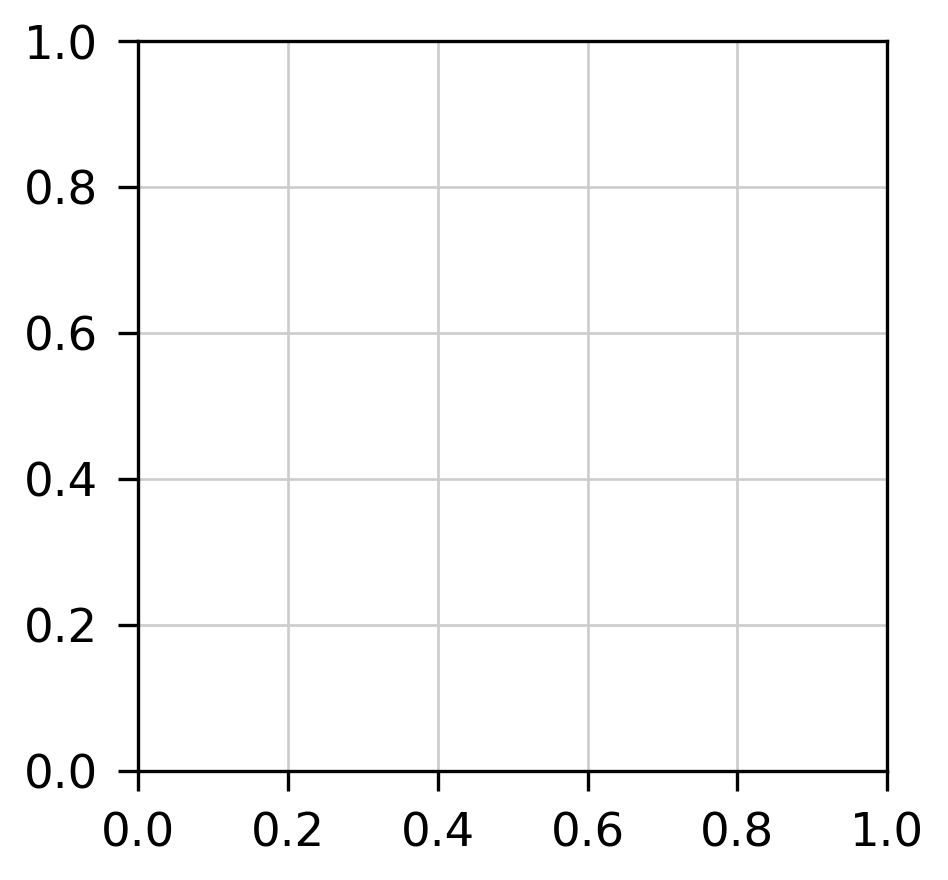

In [34]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_heatmap(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
                   fontsize=11,
          ax=ax,legend_kws={'fontsize':12,'bbox_to_anchor':(3, -0.9),'loc':'center left',})

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 519.154246098634
Plotting legends..
Estimated legend width: 17.767277777777778 mm


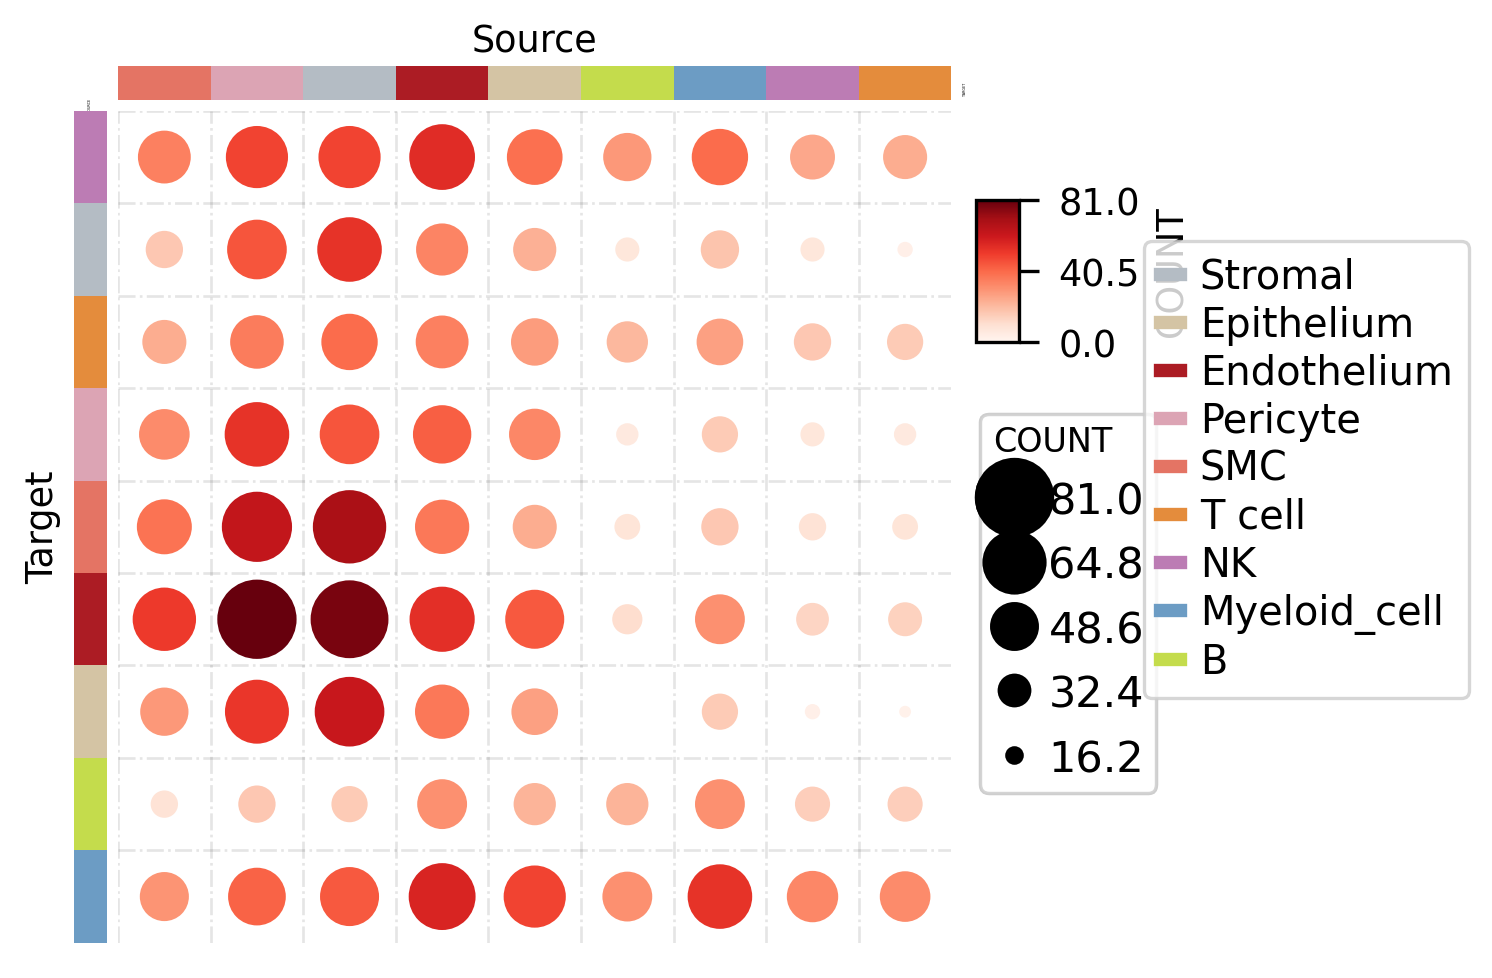

In [36]:
import matplotlib.pyplot as plt

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(4, 4))

# 生成热图
ov.pl.cpdb_heatmap(
    adata,
    interaction['interaction_edges'],
    celltype_key='anno_celltype',
    fontsize=11,
    ax=ax,
    legend_kws={'fontsize': 12, 'bbox_to_anchor': (3, -0.9), 'loc': 'center left'}
)

# 保存为 PDF
plt.savefig('figures/cc_heatmap_diagram_total.pdf', format='pdf', bbox_inches='tight')

# 显示图形
plt.show()


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 199.3251200933952
Plotting legends..
Estimated legend width: 14.465277777777779 mm


<Axes: ylabel='COUNT'>

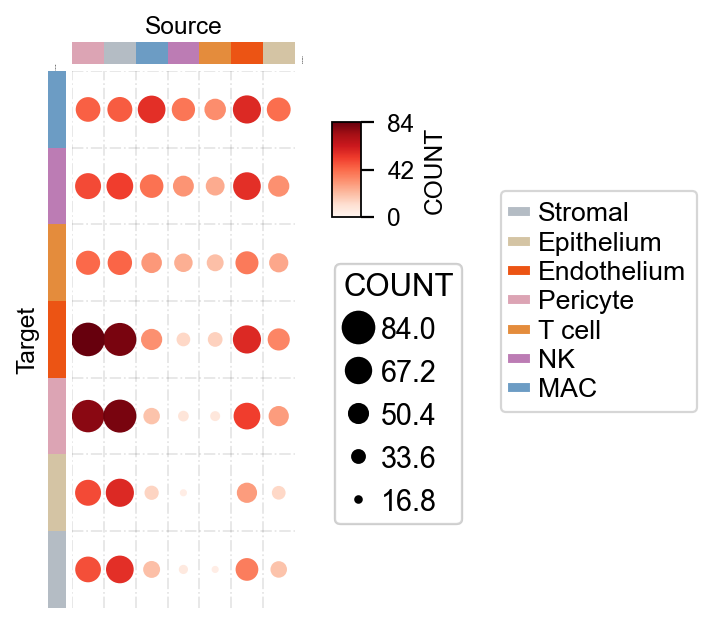

In [15]:
fig, ax = plt.subplots(figsize=(2,4)) 
ov.pl.cpdb_heatmap(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
                #    source_cells=['EVT_1','EVT_2','dNK1','dNK2','dNK3'],
          ax=ax,legend_kws={'fontsize':12,'bbox_to_anchor':(5, -0.9),'loc':'center left',})

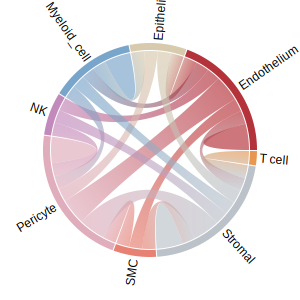

In [31]:
fig=ov.pl.cpdb_chord(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
          count_min=40,fontsize=12,padding=50,radius=100)
fig.show()

<AxesSubplot: >

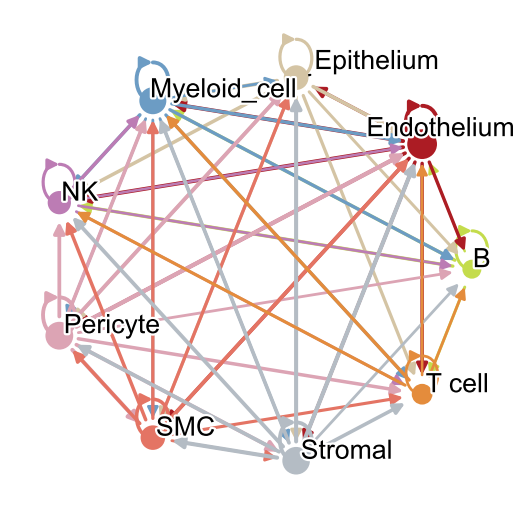

In [32]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
             counts_min=10,
            nodesize_scale=5,
                  ax=ax)

<AxesSubplot: >

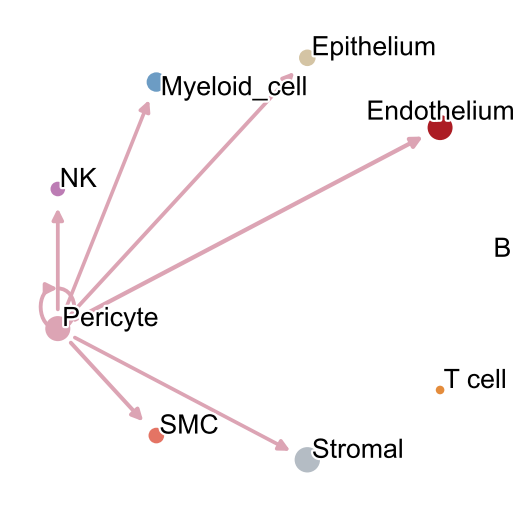

In [34]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
            counts_min=40,
            nodesize_scale=5,
            source_cells=['Pericyte'],
            ax=ax)

<AxesSubplot: >

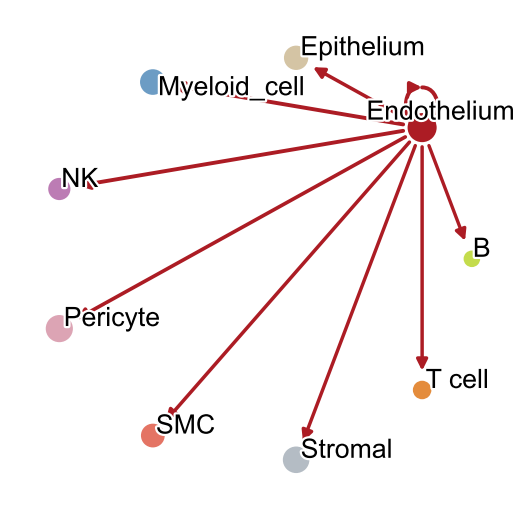

In [37]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
            counts_min=20,
            nodesize_scale=5,
            source_cells=["Endothelium"],
            ax=ax)

<AxesSubplot: >

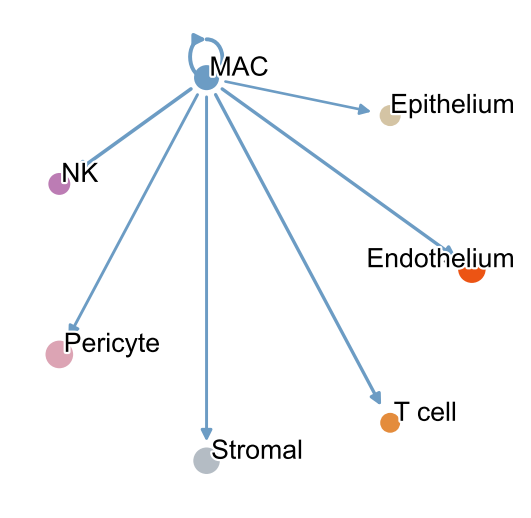

In [76]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
            counts_min=10,
            nodesize_scale=5,
            source_cells=["MAC"],
            ax=ax)

<AxesSubplot: >

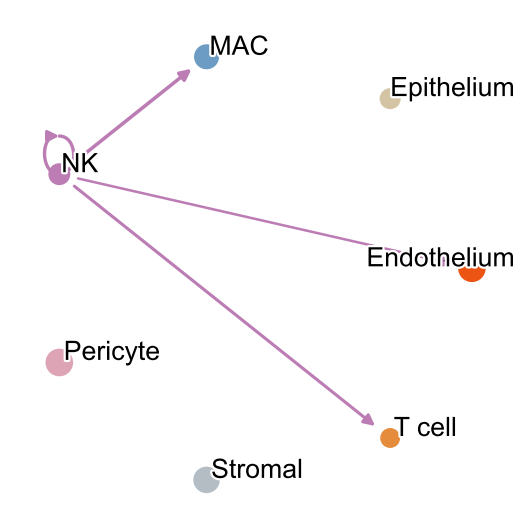

In [77]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
            counts_min=10,
            nodesize_scale=5,
            source_cells=["NK"],
            ax=ax)

<AxesSubplot: >

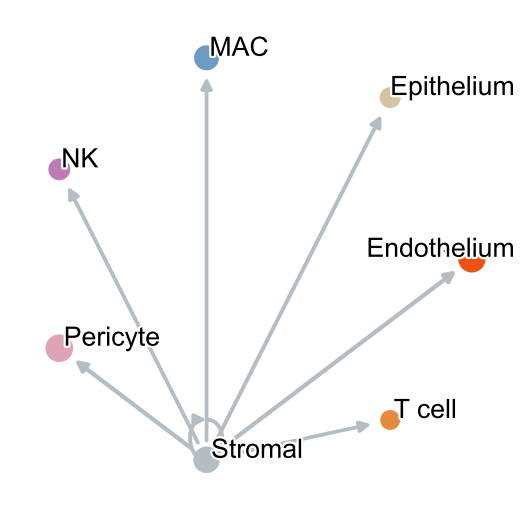

In [78]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
            counts_min=10,
            nodesize_scale=5,
            source_cells=["Stromal"],
            ax=ax)

<AxesSubplot: >

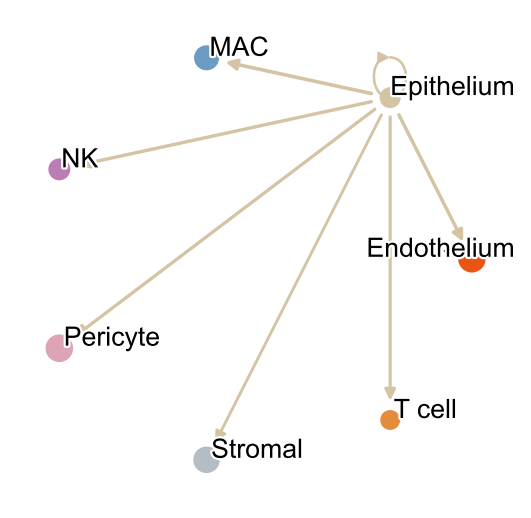

In [79]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='anno_celltype',
            counts_min=10,
            nodesize_scale=5,
            source_cells=["Epithelium"],
            ax=ax)

<AxesSubplot: >

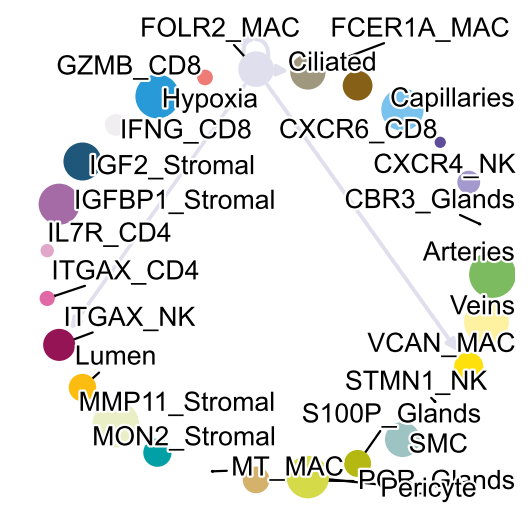

In [46]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='minor_celltype',
            counts_min=40,
            nodesize_scale=5,
            source_cells=["FOLR2_MAC"],
            ax=ax)

<AxesSubplot: >

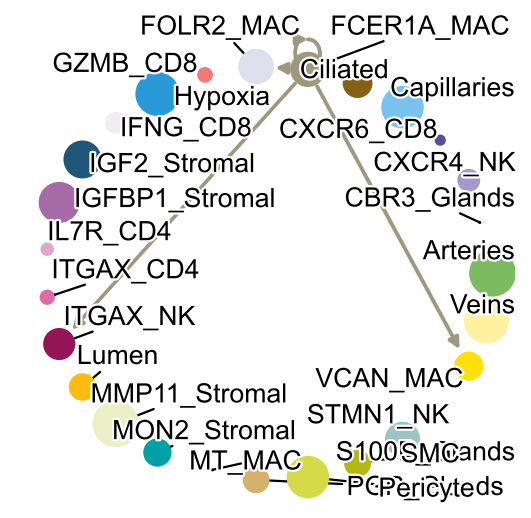

In [47]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='minor_celltype',
            counts_min=40,
            nodesize_scale=5,
            source_cells=["FCER1A_MAC"],
            ax=ax)

<AxesSubplot: >

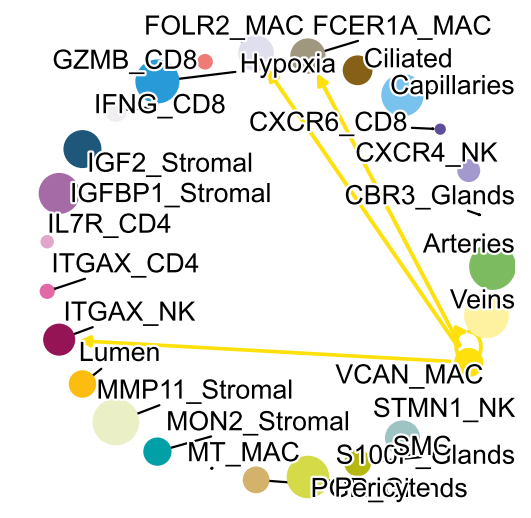

In [49]:
fig, ax = plt.subplots(figsize=(4,4)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='minor_celltype',
            counts_min=40,
            nodesize_scale=5,
            source_cells=["VCAN_MAC"],
            ax=ax)

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 92.23407089105196
Plotting legends..
Estimated legend width: 26.62764444444445 mm


<Axes: ylabel='Source'>

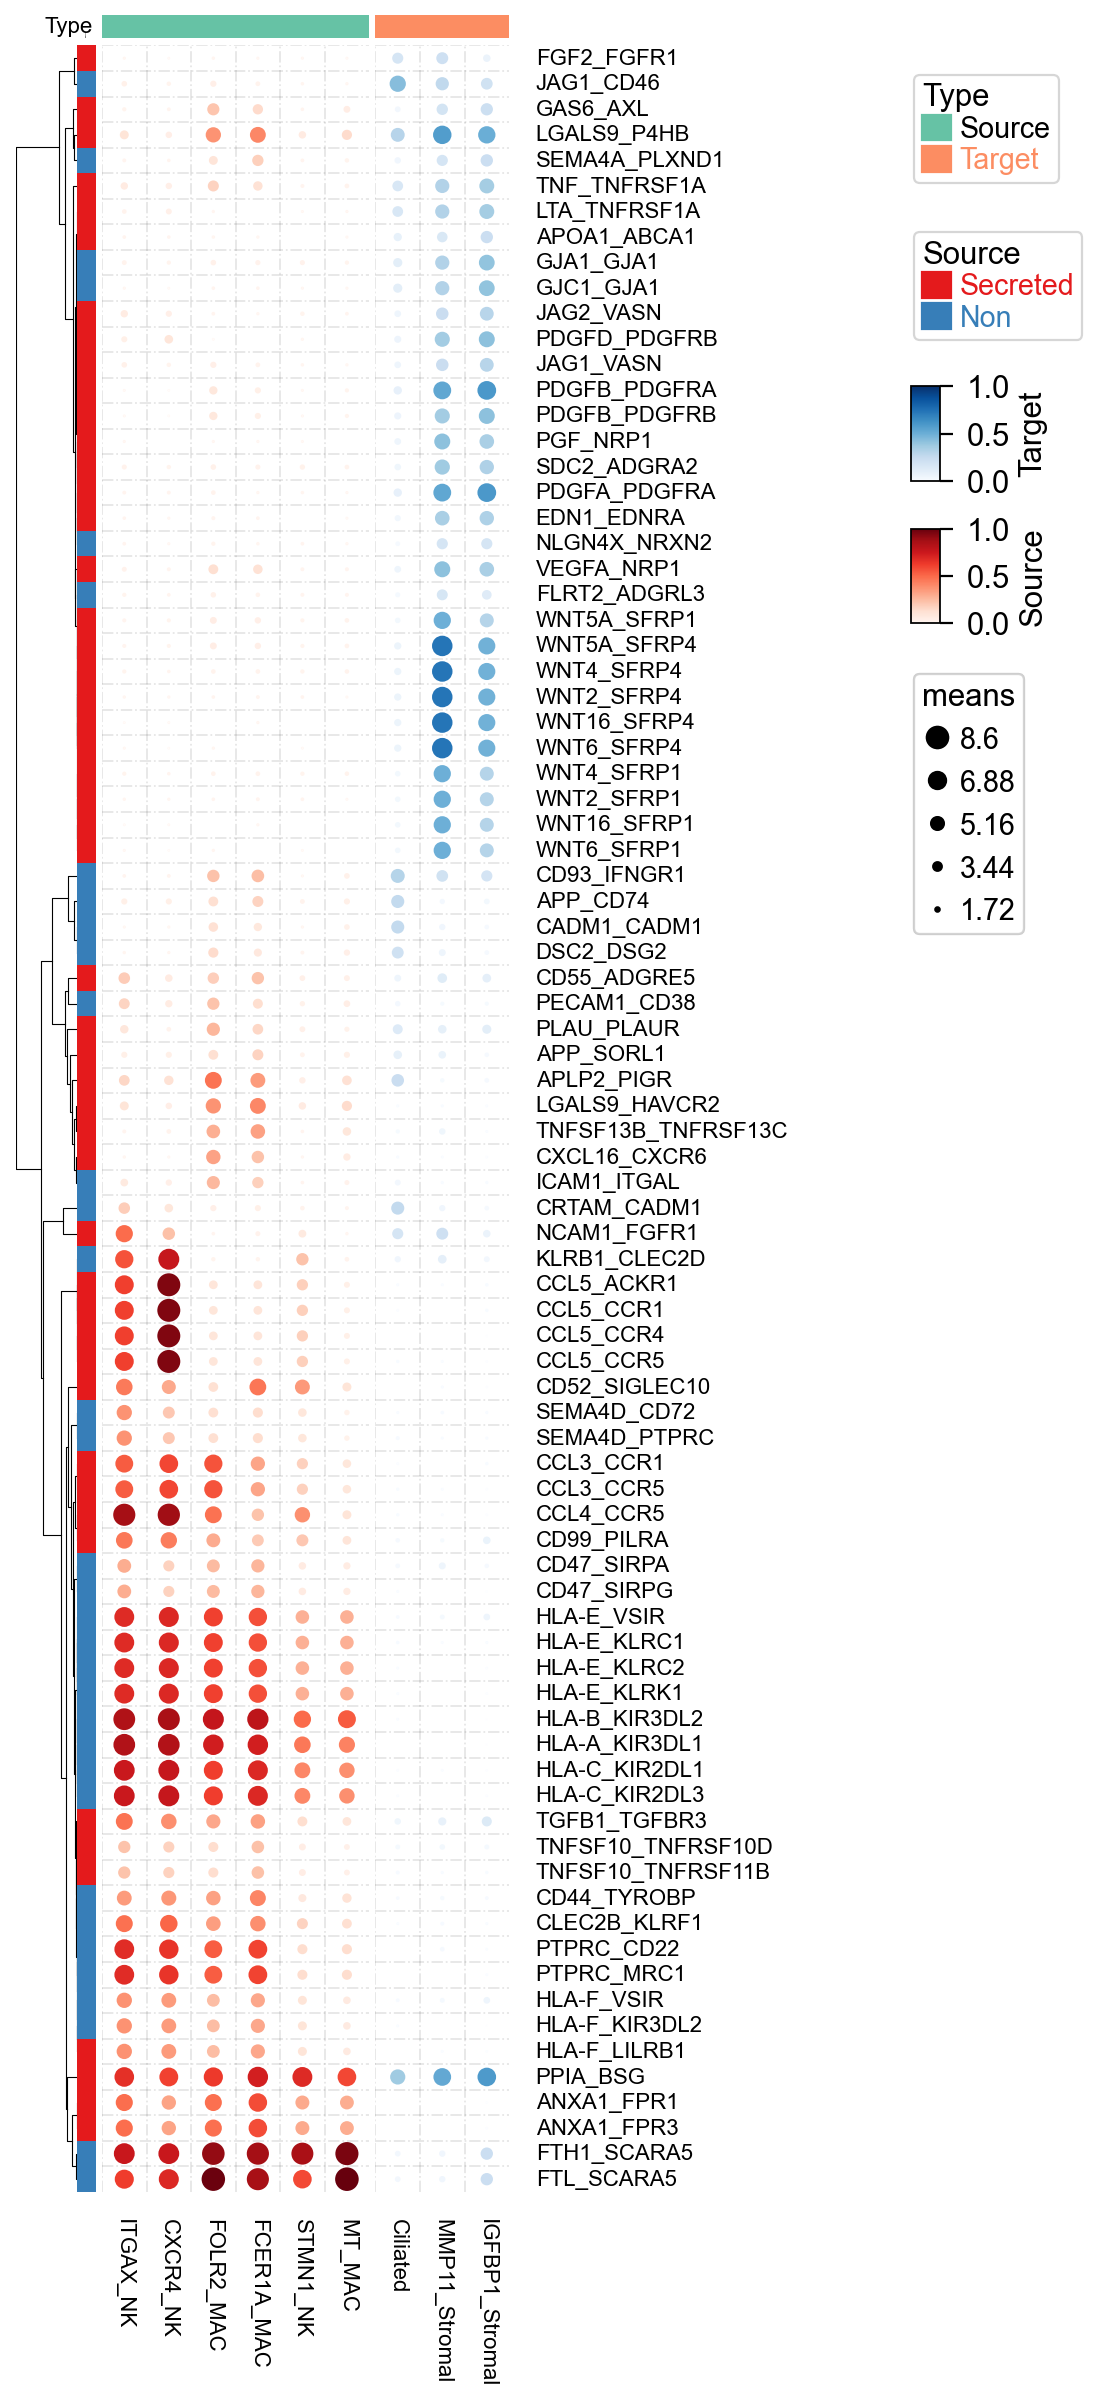

In [69]:
ov.pl.cpdb_group_heatmap(adata=adata,
                         celltype_key='minor_celltype',
                            means=cpdb_results['means'],
                            cmap={'Target':'Blues','Source':'Reds'},
                            source_cells=['STMN1_NK','ITGAX_NK','CXCR4_NK',"MT_MAC","FOLR2_MAC","FCER1A_MAC"],
                            target_cells=["MMP11_Stromal","IGFBP1_Stromal","IGF_Stromal","Ciliated"],
                            plot_secret=True,
                            min_means=8,
                            nodecolor_dict=None,
                            ax=None,
                            figsize=(4,15),
                            fontsize=10,)

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 59.02980537027326
Plotting legends..
Estimated legend width: 26.62764444444445 mm


<Axes: ylabel='Source'>

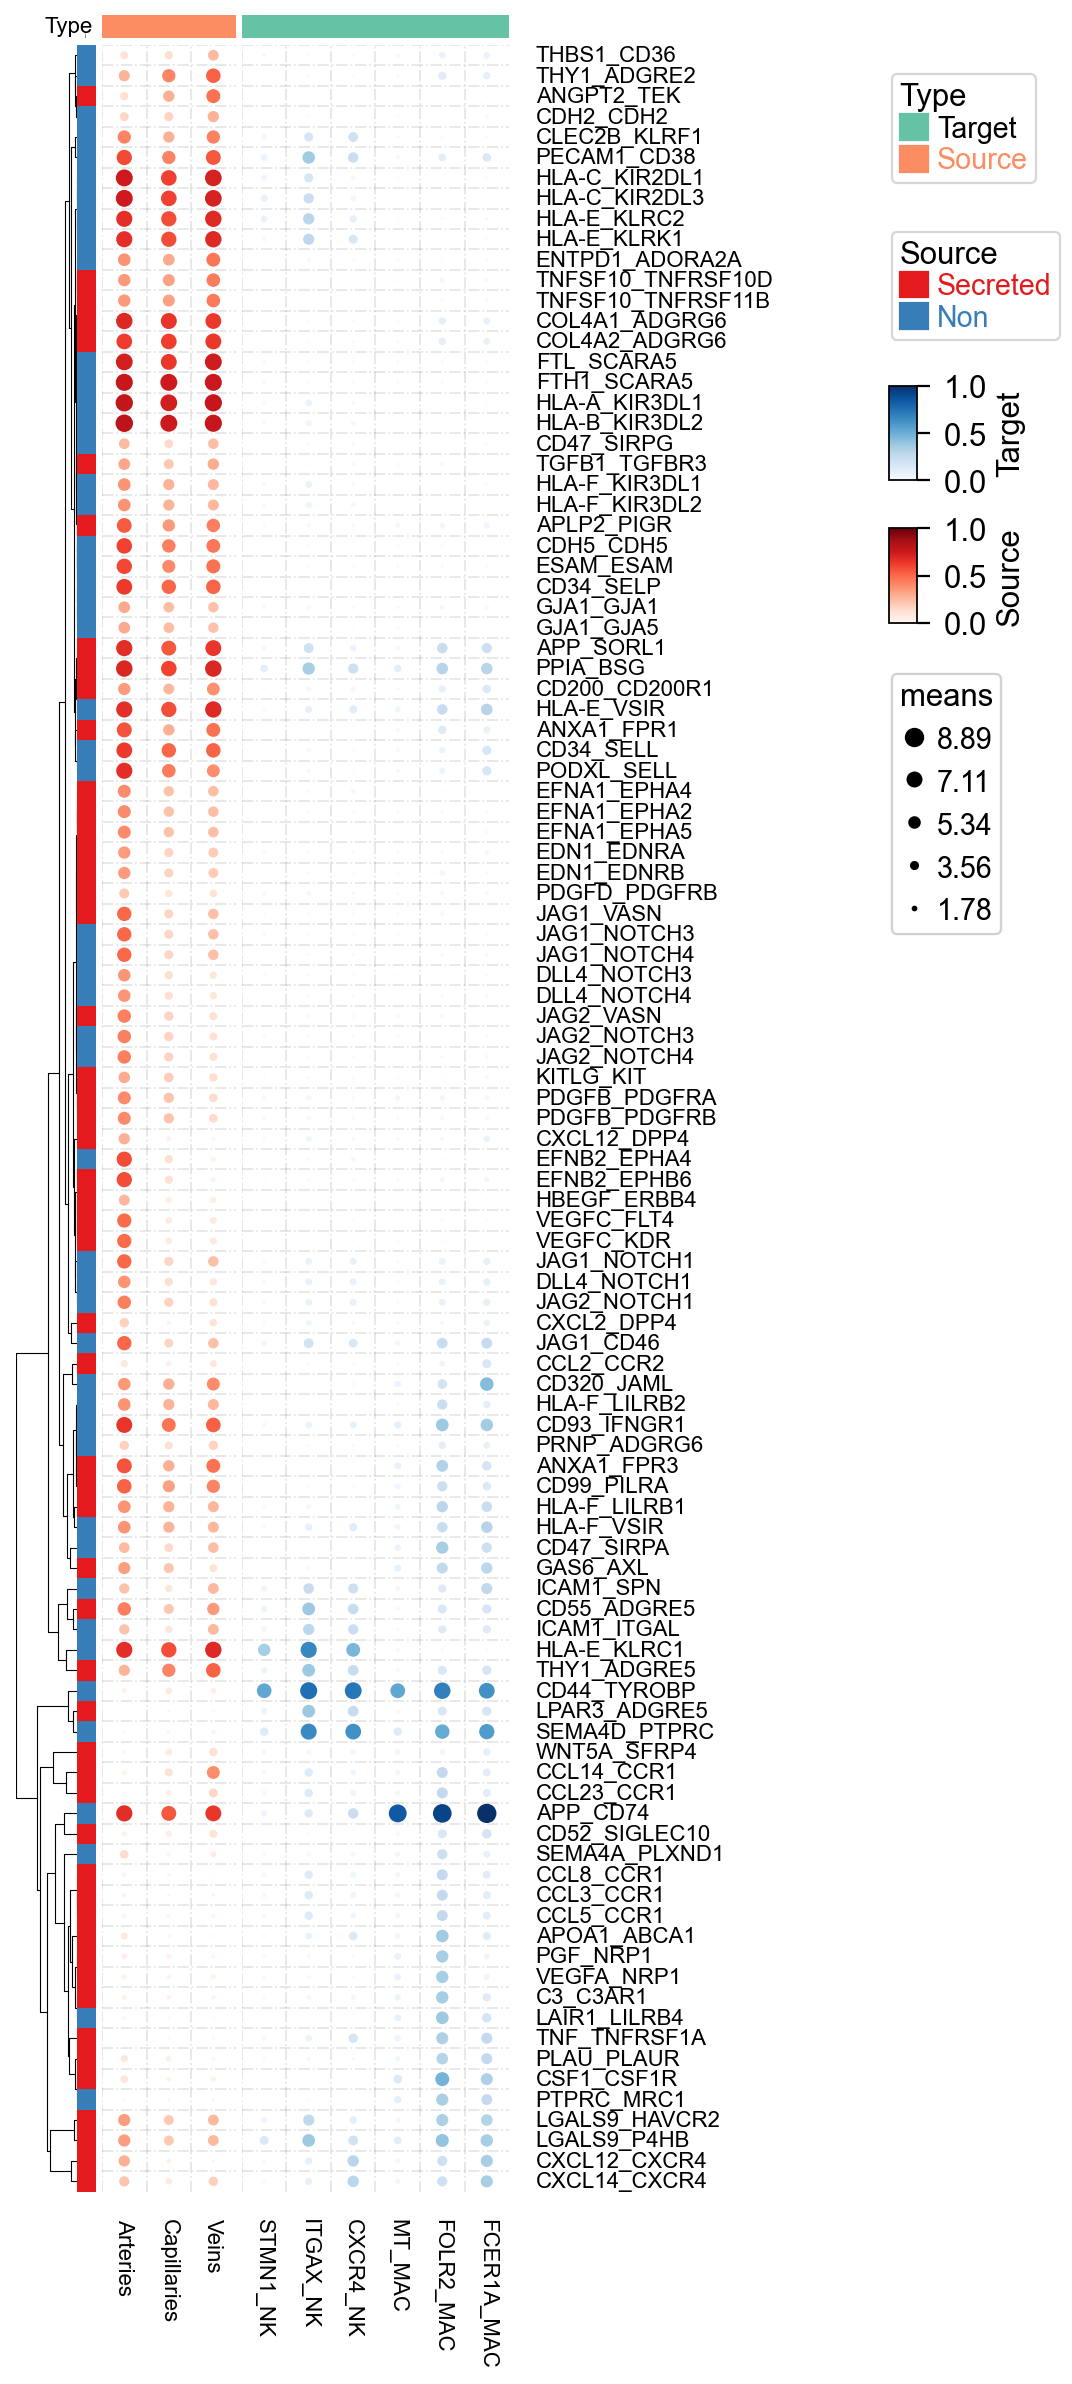

In [65]:
ov.pl.cpdb_group_heatmap(adata=adata,
                         celltype_key='minor_celltype',
                            means=cpdb_results['means'],
                            cmap={'Target':'Blues','Source':'Reds'},
                            source_cells=['Capillaries',"Arteries","Veins"],
                            target_cells=['STMN1_NK','ITGAX_NK','CXCR4_NK',"MT_MAC","FOLR2_MAC","FCER1A_MAC"],
                            plot_secret=True,
                            min_means=8,
                            nodecolor_dict=None,
                            ax=None,
                            figsize=(4,15),
                            fontsize=10,)